In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

# Latar Belakang

Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan selama kita melakukan perjalanan baik di dalam negeri maupun di luar negeri. Beberapa negara bahkan telah mewajibkan para pelancong untuk memiliki asuransi perjalanan, misalnya negara-negara di Eropa dan Amerika. Besarnya premi tergantung dari pertanggungan yang diinginkan, lama perjalanan, dan tujuan perjalanan. Sebuah perusahaan yang bergerak di bidang asuransi perjalanan ingin mengetahui pemegang polis yang akan mengajukan klaim pertanggungan. Data pemegang polis pada perusahaan asuransi merupakan data historis yang terdiri dari tujuan, produk asuransi, dan lain sebagainya.



# DATA UNDERSTANDING
* Agency: Nama agensi.
* Agency Type: Jenis agen asuransi perjalanan.
* Distribution Channel: Saluran agen asuransi perjalanan.
* Product Name: Nama produk asuransi perjalanan.
* Gender: Jenis kelamin tertanggung.
* Duration: Durasi perjalanan.
* Destination: Tujuan perjalanan.
* Net Sales: Jumlah penjualan polis asuransi perjalanan.
* Commission (in value): Komisi yang diterima untuk agen asuransi perjalanan.
* Age: Usia tertanggung.
* Claim: Status klaim


In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,30))
import seaborn as sns

<Figure size 1000x3000 with 0 Axes>

In [46]:
import pandas as pd

df = pd.read_csv("data_travel_insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [47]:
df.shape

(44328, 11)

# Step 1: Check Statistical Information

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [49]:
df_numeric = df.select_dtypes(include=['int', 'float'])
df_numeric.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [50]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.describe()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


# Step 2: Check Missing Value

In [51]:
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

# Step 3: Check Duplicate Data

In [52]:
df[df.duplicated()]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
331,EPX,Travel Agency,Online,Cancellation Plan,NaN,2,SINGAPORE,10.0,0.00,36,No
360,EPX,Travel Agency,Online,Cancellation Plan,NaN,6,MALAYSIA,10.0,0.00,36,No
473,EPX,Travel Agency,Online,Cancellation Plan,NaN,11,MALAYSIA,10.0,0.00,36,No
488,EPX,Travel Agency,Online,Cancellation Plan,NaN,2,SINGAPORE,10.0,0.00,36,No
636,EPX,Travel Agency,Online,1 way Comprehensive Plan,NaN,3,MALAYSIA,20.0,0.00,36,No
...,...,...,...,...,...,...,...,...,...,...,...
44309,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,49,VIET NAM,20.0,0.00,36,No
44311,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,5,THAILAND,29.7,17.82,38,No
44313,EPX,Travel Agency,Online,Cancellation Plan,NaN,5,CHINA,14.0,0.00,36,No
44315,EPX,Travel Agency,Online,1 way Comprehensive Plan,NaN,5,THAILAND,20.0,0.00,36,No


In [53]:
# drop duplicated data
df = df.drop_duplicates()

In [54]:
df = df.dropna(subset=['Claim'])

In [55]:
df.shape

(39661, 11)

# Step 4: Distribution Plot


In [56]:
# Numerical variable
def plot_hist(variable):
    plt.figure(figsize = (10,30))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [57]:
print(df_numeric.columns)

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')


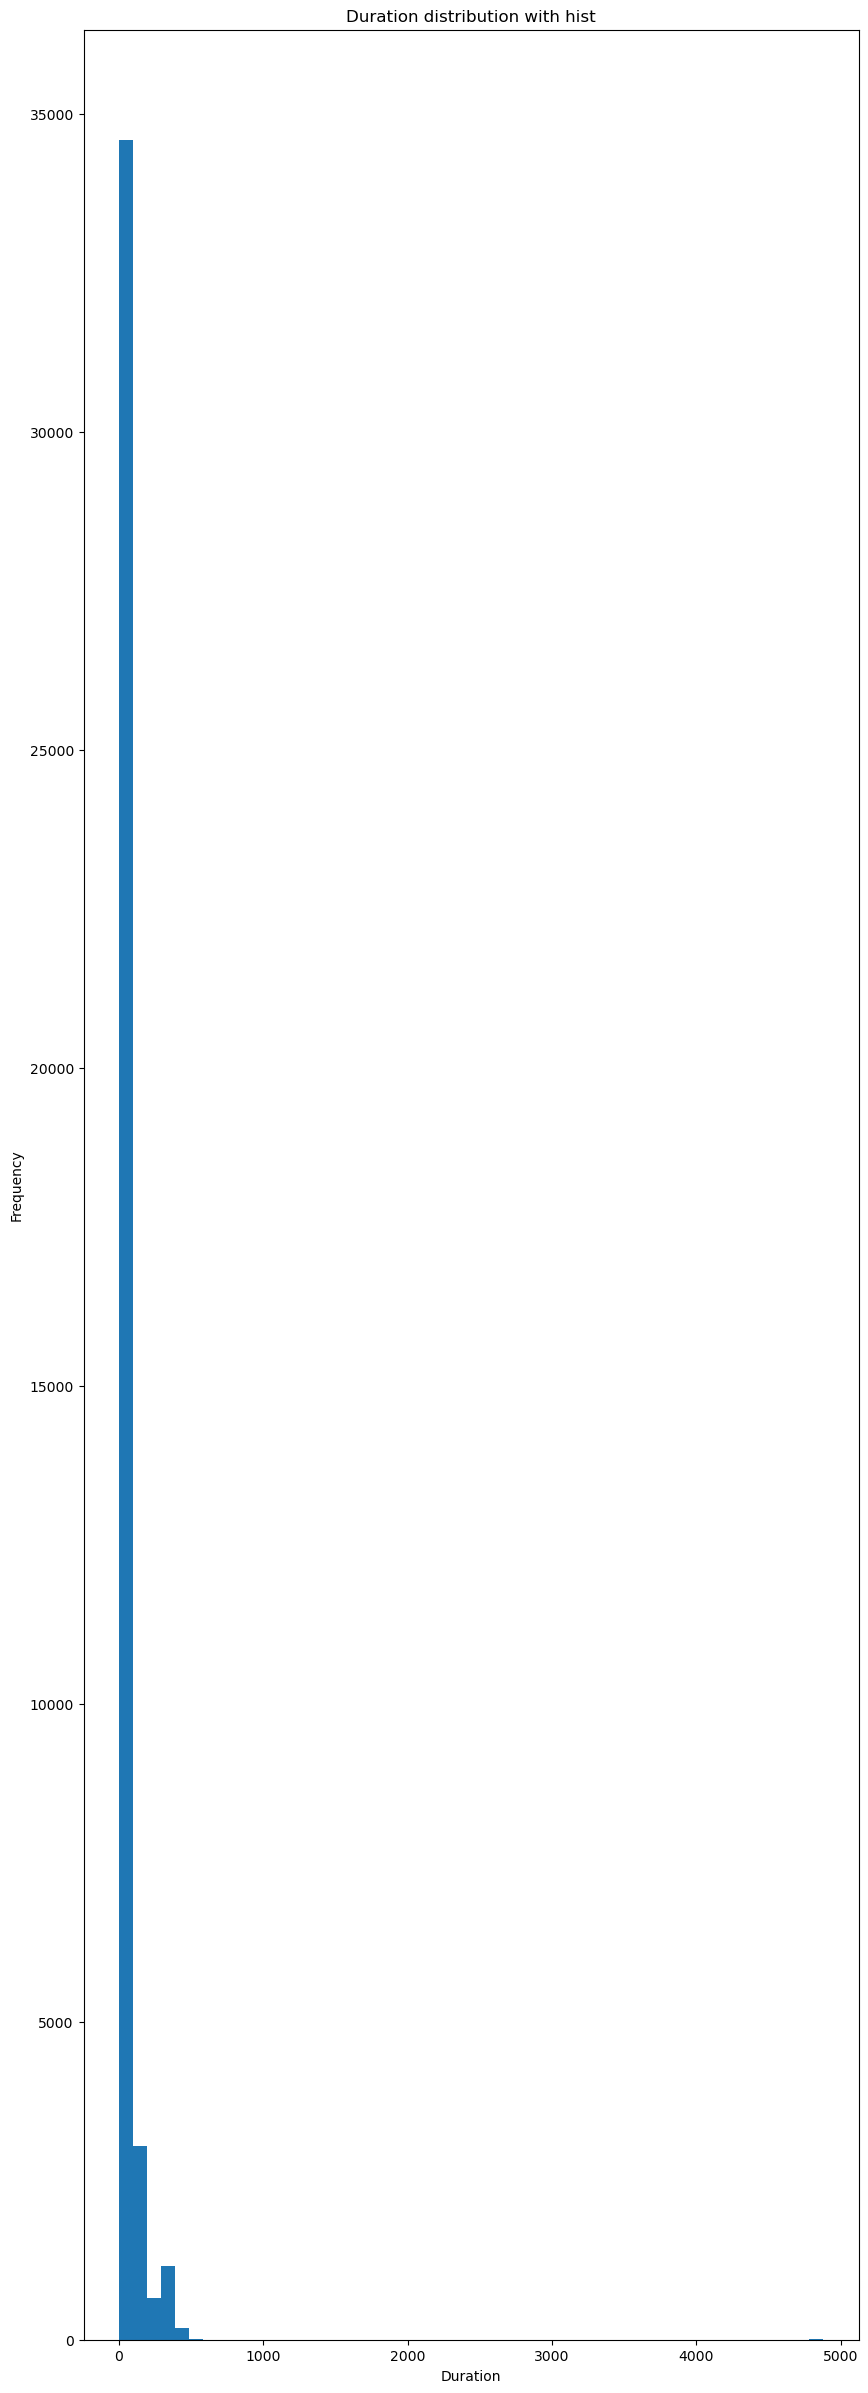

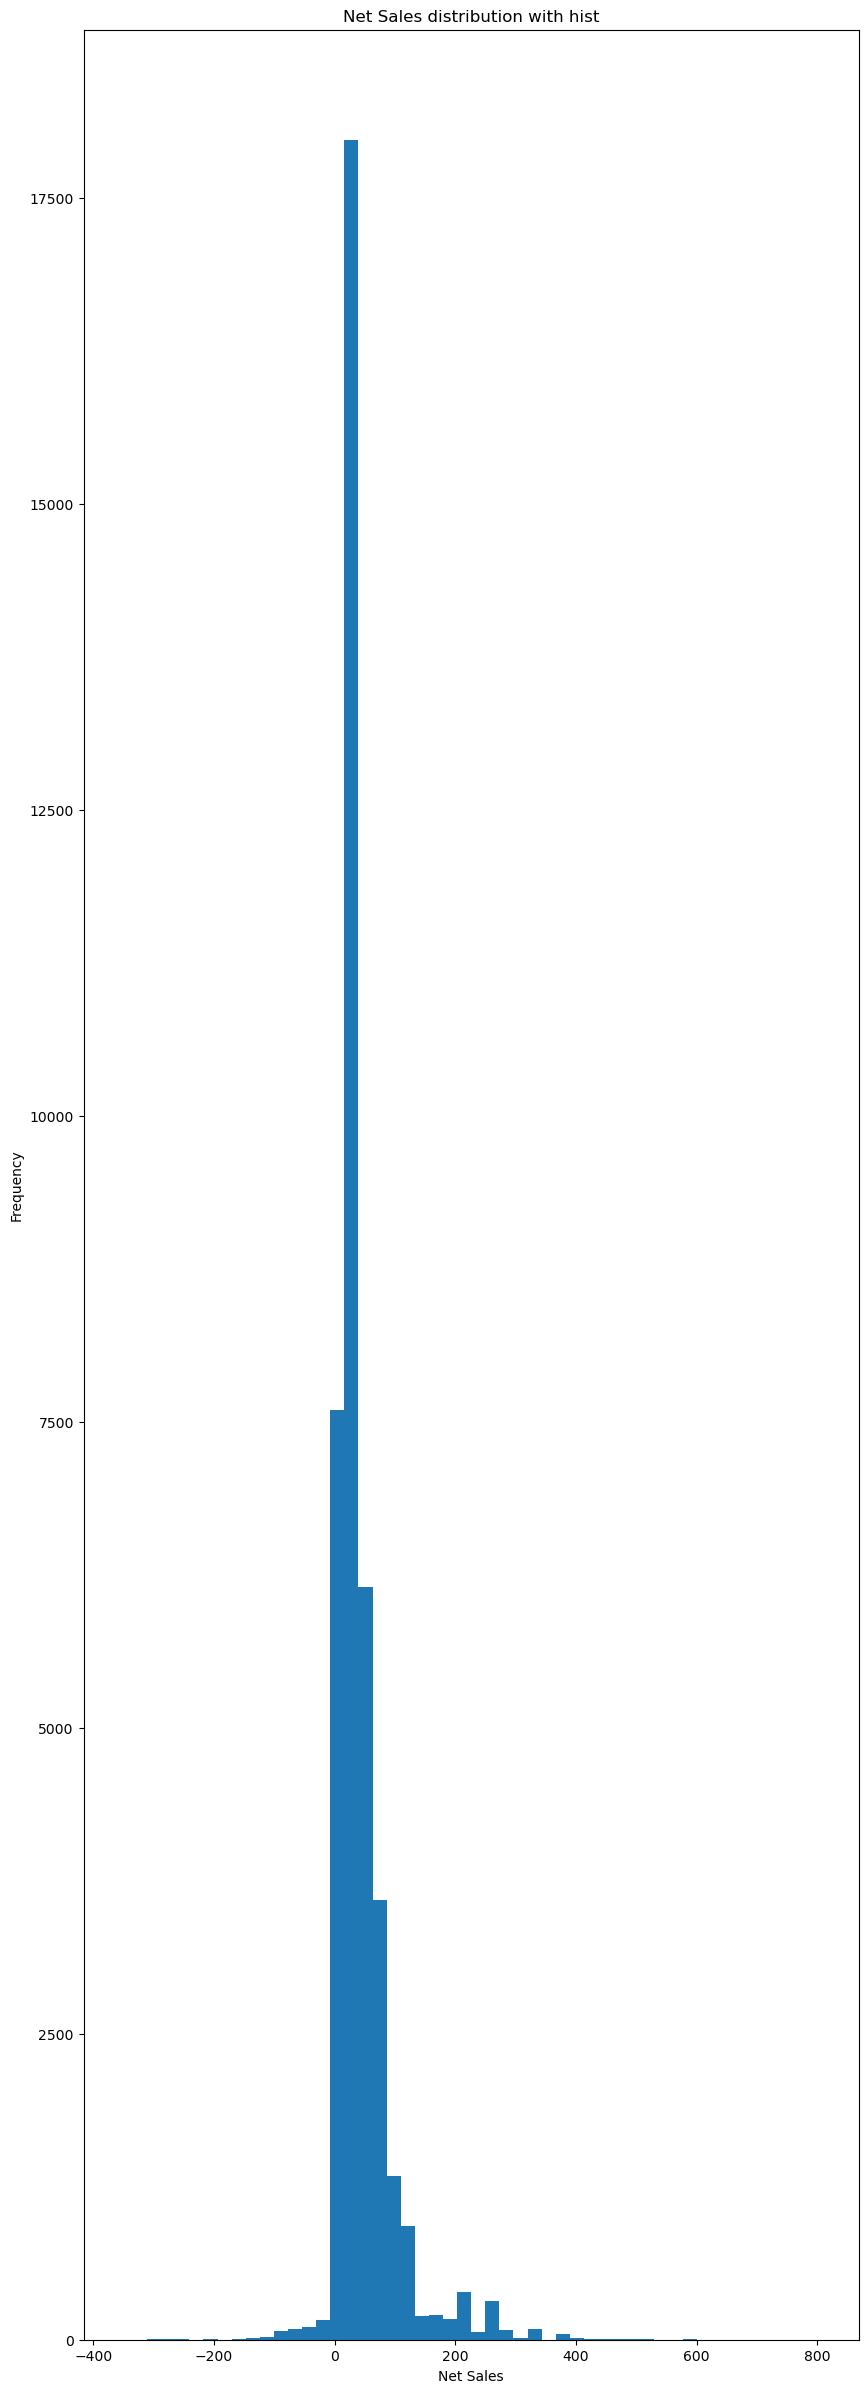

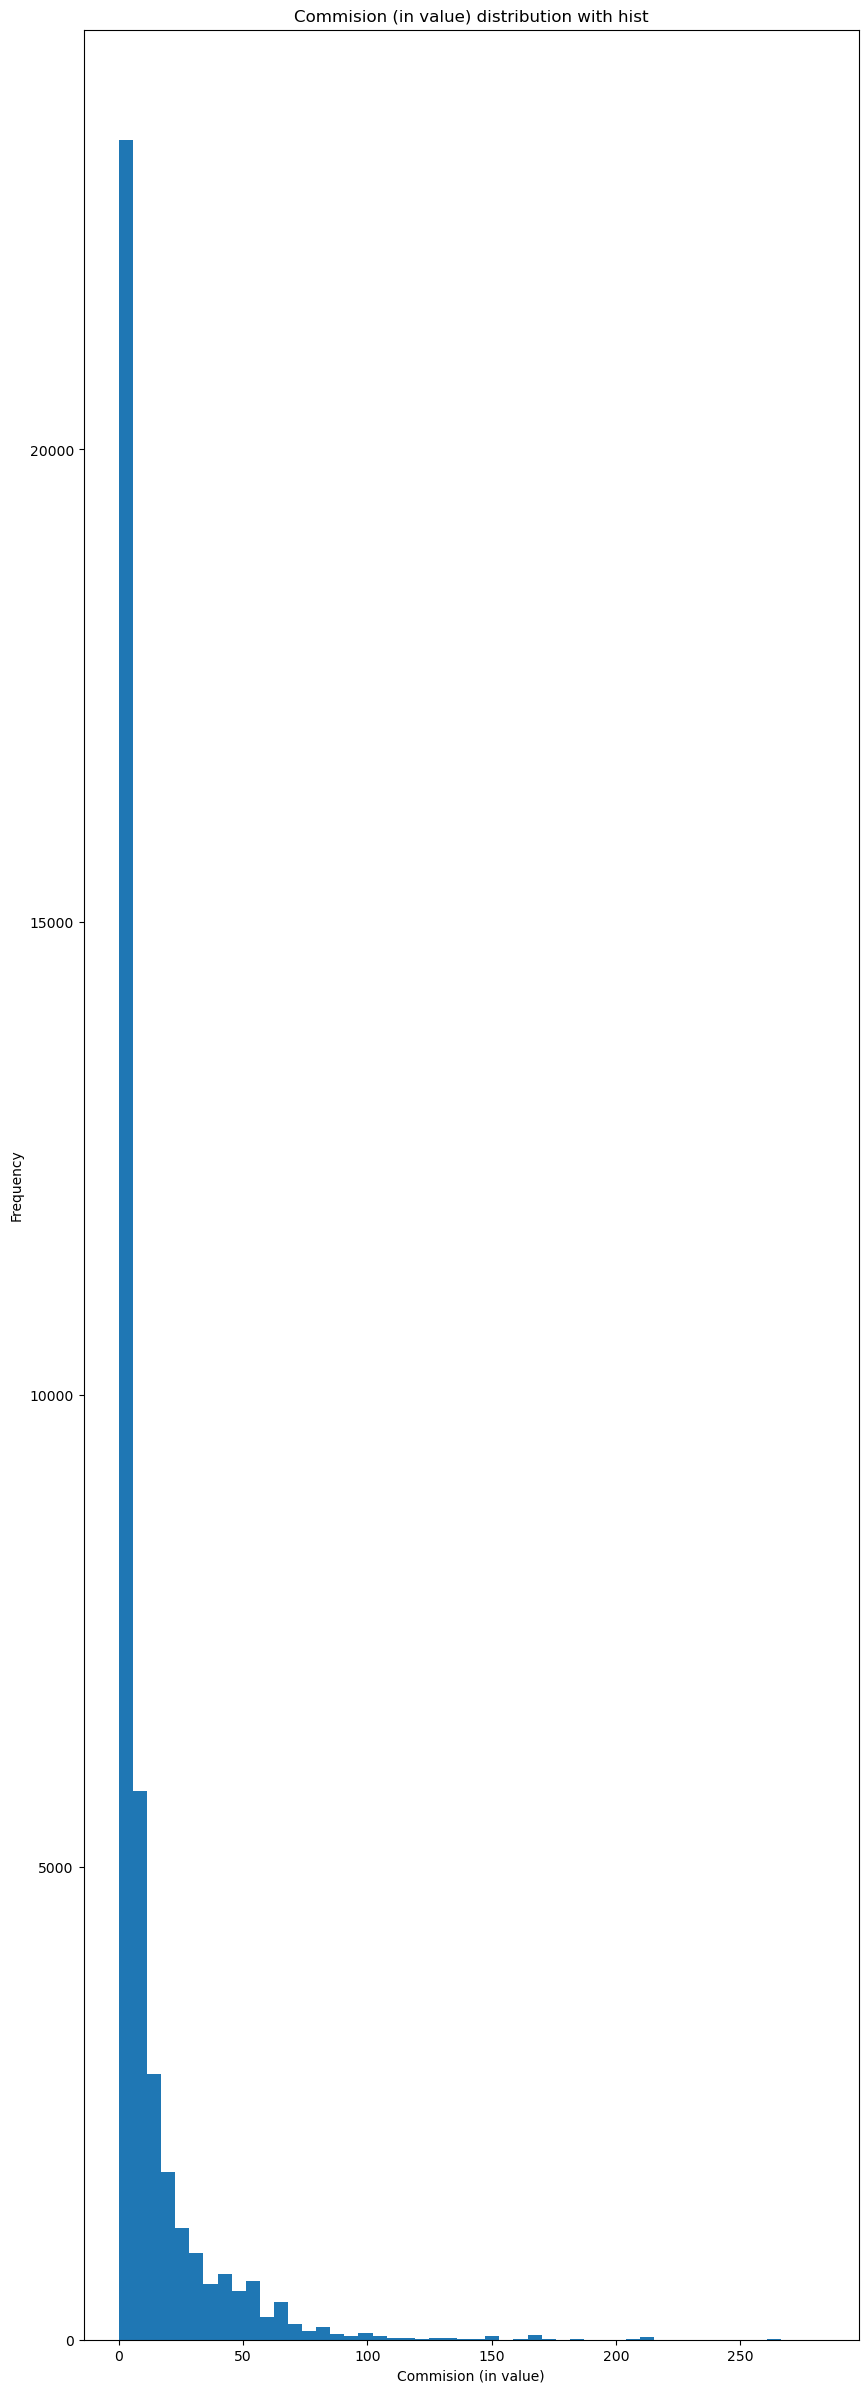

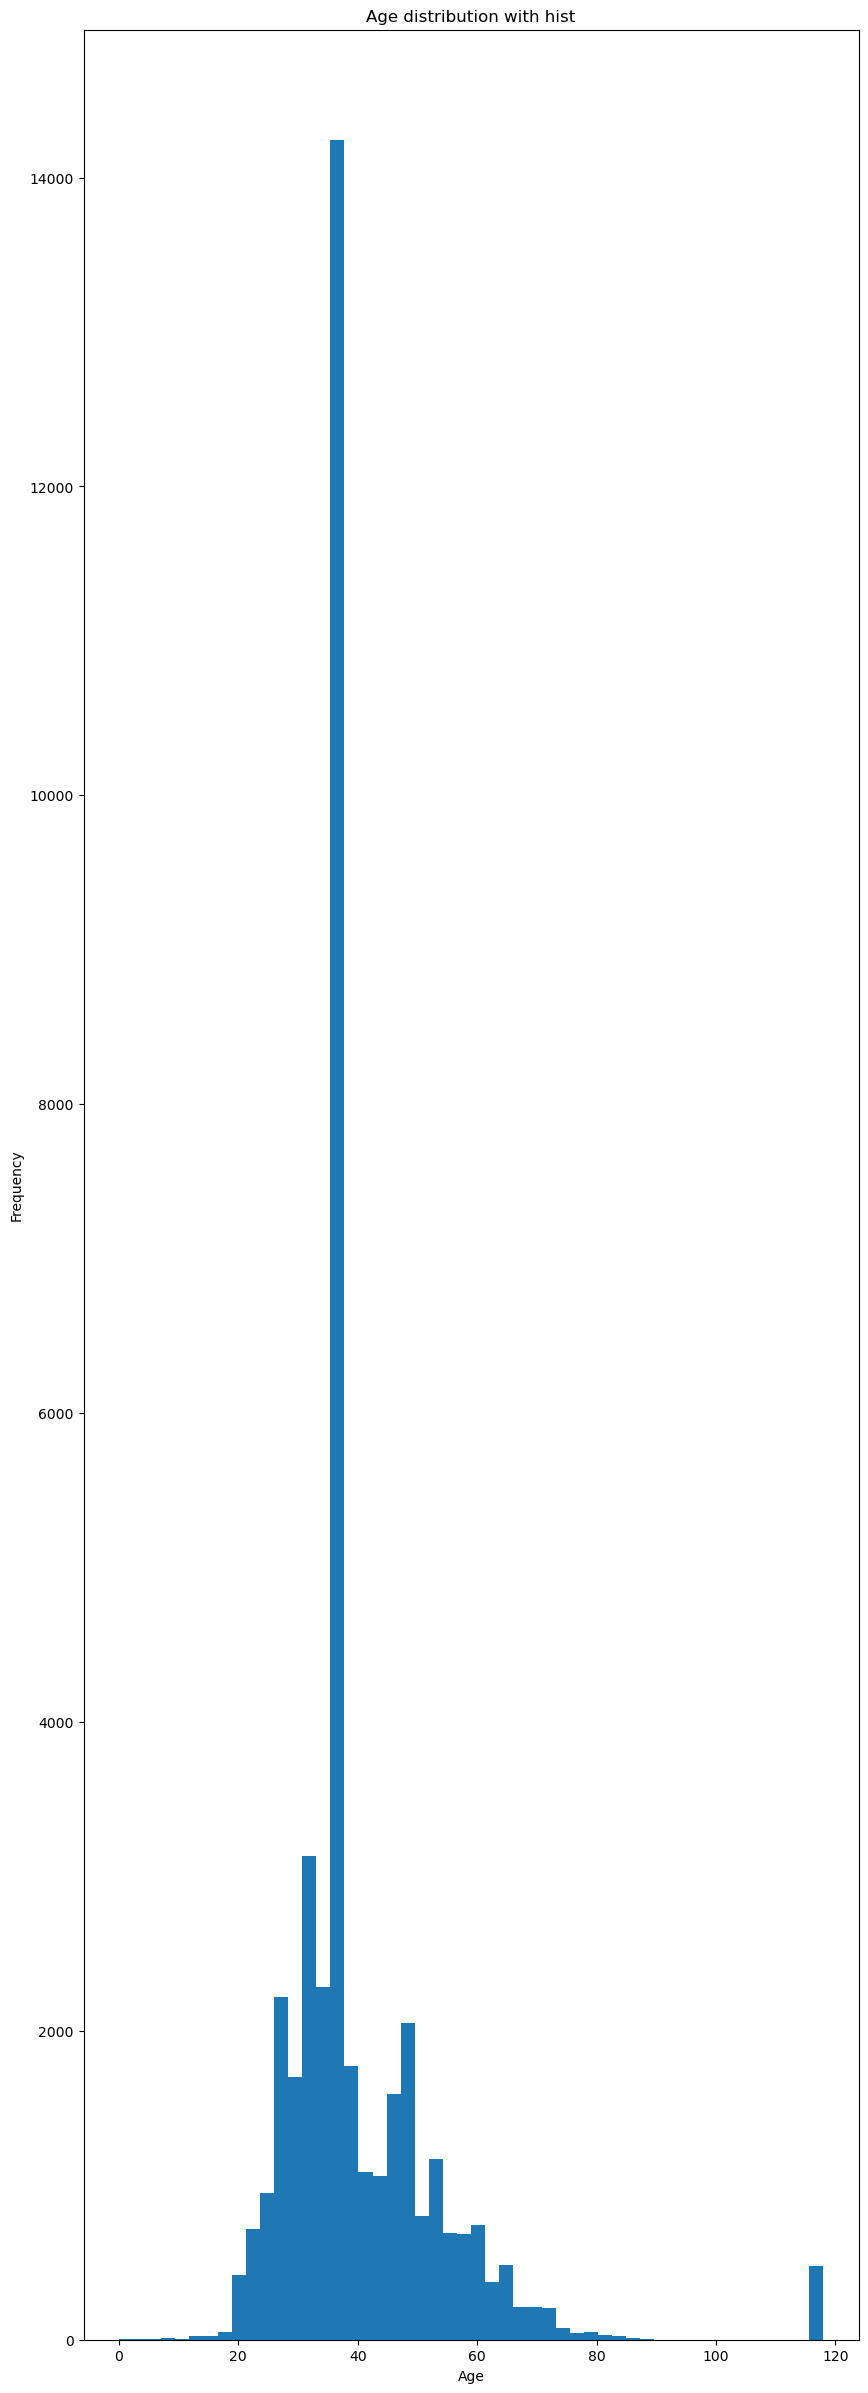

In [58]:
category1 = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']
for c in category1:
    plot_hist(c)

In [59]:
# Categorical variable
def bar_plot(variable):

    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize = (6,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    #print("{}: \n {}".format(variable,varValue))

In [60]:
print(df_categorical.columns)

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Gender', 'Destination', 'Claim'],
      dtype='object')


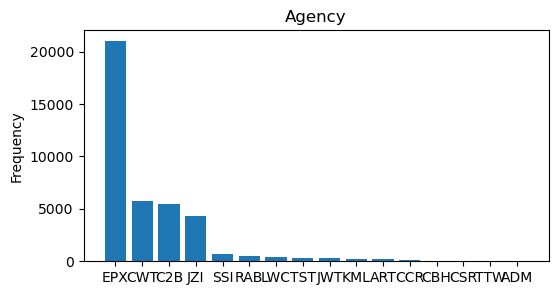

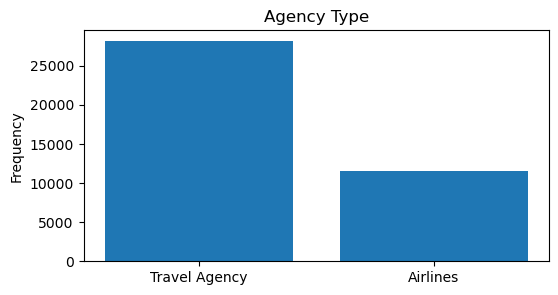

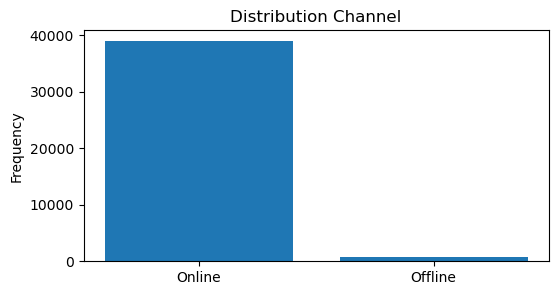

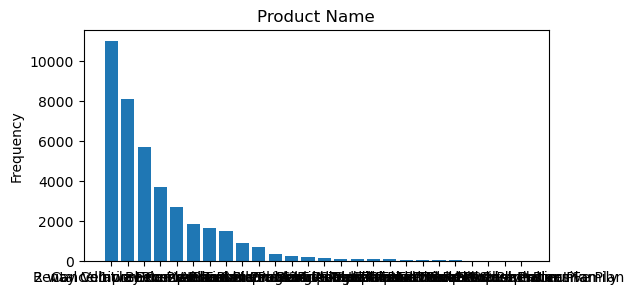

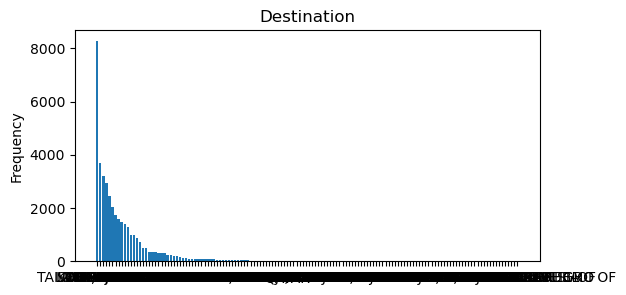

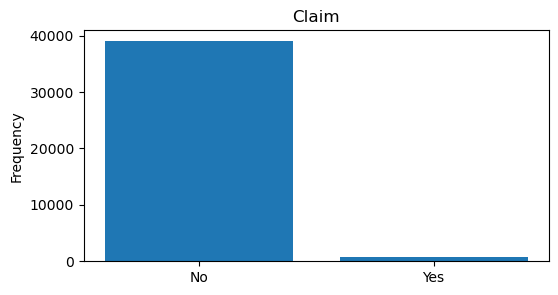

In [61]:
# Categorical variable
category2 = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Claim']
for c in category2:
    bar_plot(c)

In [62]:
# Class distribution
df.Claim.value_counts(normalize=True)

No     0.982981
Yes    0.017019
Name: Claim, dtype: float64

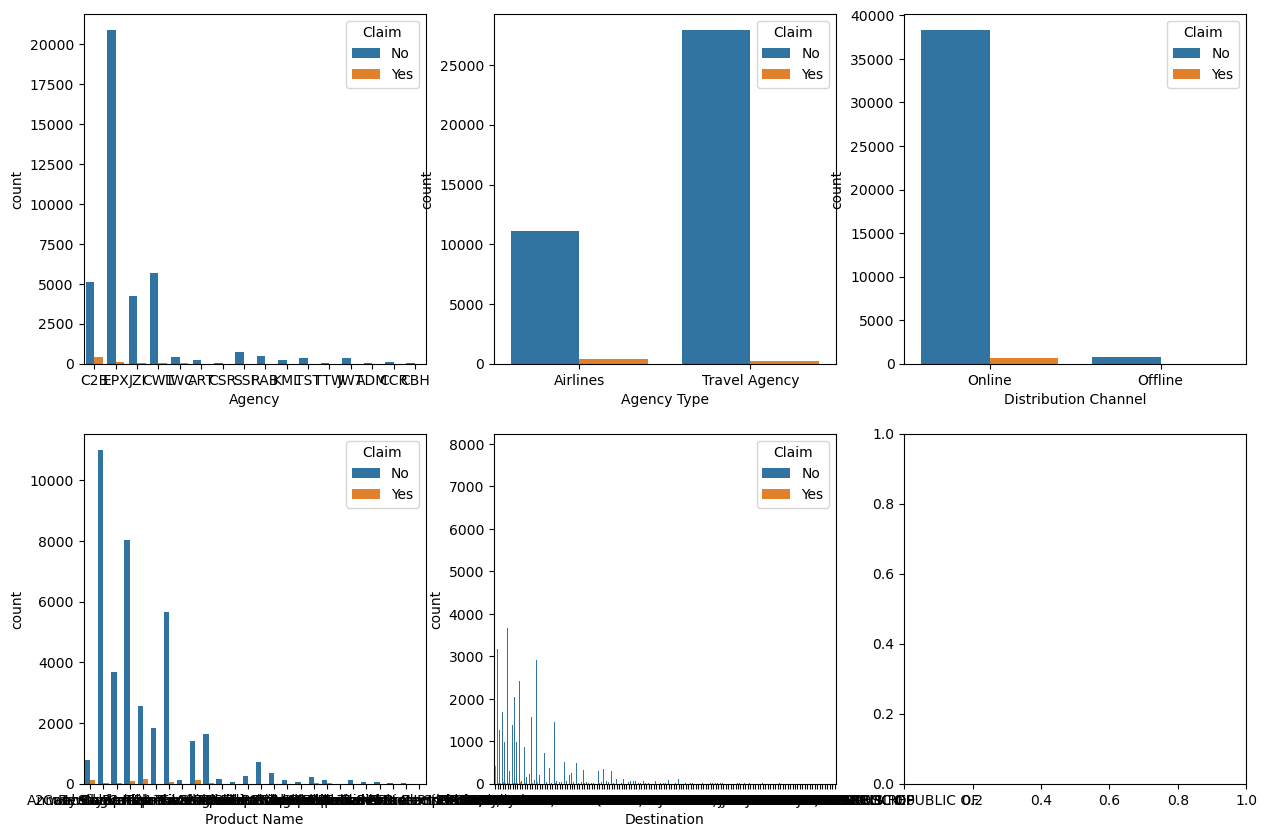

In [63]:
# Feature by target
columns = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for col, ax in zip(columns, axes.flatten()):
    sns.countplot(x=col, data=df, hue="Claim", ax=ax)

# Step 6: Categorical to Numerical Value

In [64]:
df['Agency'].unique()

array(['C2B', 'EPX', 'JZI', 'CWT', 'LWC', 'ART', 'CSR', 'SSI', 'RAB',
       'KML', 'TST', 'TTW', 'JWT', 'ADM', 'CCR', 'CBH'], dtype=object)

In [65]:
df.Agency = df.Agency.replace(to_replace=[i for i in df['Agency'].unique()],
                                    value=[i for i in range(16)], inplace=False)

In [66]:
df['Agency Type'].unique()

array(['Airlines', 'Travel Agency'], dtype=object)

In [67]:
df['Agency Type'] = df['Agency Type'].replace(to_replace=['Airlines', 'Travel Agency'],
                                              value=[0,1], inplace=False)

In [68]:
df['Distribution Channel'].unique()

array(['Online', 'Offline'], dtype=object)

In [69]:
df['Distribution Channel'] = df['Distribution Channel'].replace(to_replace=['Online', 'Offline'],
                                                                value=[0,1], inplace=False)

In [70]:
df['Product Name'].unique()

array(['Annual Silver Plan', 'Cancellation Plan', 'Basic Plan',
       '2 way Comprehensive Plan', 'Bronze Plan',
       '1 way Comprehensive Plan', 'Rental Vehicle Excess Insurance',
       'Single Trip Travel Protect Gold', 'Silver Plan', 'Value Plan',
       '24 Protect', 'Annual Travel Protect Gold', 'Comprehensive Plan',
       'Ticket Protector', 'Travel Cruise Protect',
       'Single Trip Travel Protect Silver',
       'Individual Comprehensive Plan', 'Gold Plan', 'Annual Gold Plan',
       'Child Comprehensive Plan', 'Premier Plan',
       'Annual Travel Protect Silver',
       'Single Trip Travel Protect Platinum',
       'Annual Travel Protect Platinum',
       'Spouse or Parents Comprehensive Plan',
       'Travel Cruise Protect Family'], dtype=object)

In [71]:
df['Product Name'] = df['Product Name'].replace(to_replace=[i for i in df['Product Name'].unique()],
                                                  value=[i for i in range(26)], inplace=False)

In [72]:
df['Destination'].unique()

array(['SINGAPORE', 'MALAYSIA', 'INDIA', 'UNITED STATES',
       'KOREA, REPUBLIC OF', 'THAILAND', 'GERMANY', 'JAPAN', 'INDONESIA',
       'VIET NAM', 'AUSTRALIA', 'FINLAND', 'UNITED KINGDOM', 'SRI LANKA',
       'SPAIN', 'HONG KONG', 'MACAO', 'CHINA', 'UNITED ARAB EMIRATES',
       'IRAN, ISLAMIC REPUBLIC OF', 'TAIWAN, PROVINCE OF CHINA', 'POLAND',
       'CANADA', 'OMAN', 'PHILIPPINES', 'GREECE', 'BELGIUM', 'TURKEY',
       'BRUNEI DARUSSALAM', 'DENMARK', 'SWITZERLAND', 'NETHERLANDS',
       'SWEDEN', 'MYANMAR', 'KENYA', 'CZECH REPUBLIC', 'FRANCE',
       'RUSSIAN FEDERATION', 'PAKISTAN', 'ARGENTINA',
       'TANZANIA, UNITED REPUBLIC OF', 'SERBIA', 'ITALY', 'CROATIA',
       'NEW ZEALAND', 'PERU', 'MONGOLIA', 'CAMBODIA', 'QATAR', 'NORWAY',
       'LUXEMBOURG', 'MALTA', "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
       'ISRAEL', 'SAUDI ARABIA', 'AUSTRIA', 'PORTUGAL', 'NEPAL',
       'UKRAINE', 'ESTONIA', 'ICELAND', 'BRAZIL', 'MEXICO',
       'CAYMAN ISLANDS', 'PANAMA', 'BANGLADESH', 'TURKME

In [73]:
df['Destination'] = df['Destination'].replace(to_replace=[i for i in df['Destination'].unique()],
                                              value = [i for i in range(138)], inplace=False)

In [74]:
df['Claim'].unique()

array(['No', 'Yes'], dtype=object)

In [75]:
df['Claim'] = df['Claim'].replace(to_replace=['No', 'Yes'], value= [0,1], inplace=False)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39661 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                39661 non-null  int64  
 1   Agency Type           39661 non-null  int64  
 2   Distribution Channel  39661 non-null  int64  
 3   Product Name          39661 non-null  int64  
 4   Gender                11994 non-null  object 
 5   Duration              39661 non-null  int64  
 6   Destination           39661 non-null  int64  
 7   Net Sales             39661 non-null  float64
 8   Commision (in value)  39661 non-null  float64
 9   Age                   39661 non-null  int64  
 10  Claim                 39661 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 3.6+ MB


# Step 6: Correlation Heatmap

In [77]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,0,0,0,0,F,365,0,216.0,54.0,57,0
1,1,1,0,1,NaN,4,1,10.0,0.0,33,0
2,2,0,0,2,M,19,2,22.0,7.7,26,0
3,1,1,0,3,NaN,20,3,112.0,0.0,59,0
4,0,0,0,4,M,8,0,16.0,4.0,28,0


Encoding`

In [78]:
data_path = "C:/Users/Asus/Documents/PURWADIKA/capstone 3/Travel insurance/data_travel_insurance.csv"
df = pd.read_csv(data_path)

# Handling missing values in 'Gender'
df['Gender'].fillna('Not Specified', inplace=True)

# Convert 'Claim' to binary
df['Claim'] = df['Claim'].map({'No': 0, 'Yes': 1})

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Encode categorical variables and handle unknown categories
categorical_features = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Gender']
numeric_features = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [80]:
# Apply preprocessing to the whole dataset
X = df.drop('Claim', axis=1)
y = df['Claim']
X_transformed = preprocessor.fit_transform(X)

# spliting


In [81]:
# Manual split of the data
split_point = int(len(df) * 0.8)
X_train, X_test = X_transformed[:split_point], X_transformed[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# modeling


In [82]:
pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/ae/20/6d1a0a61d468b37a142fd90bb93c73bc1c2205db4a69ac630ed218c31612/scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.5.0-cp311-cp311-win_amd64.whl (11.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [83]:
pip install --upgrade --force-reinstall scikit-lear

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scikit-lear (from versions: none)
ERROR: No matching distribution found for scikit-lear


In [84]:
pip install scikit-learn==1.2.2

  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.0
    Uninstalling scikit-learn-1.5.0:
      Successfully uninstalled scikit-learn-1.5.0
Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install --upgrade numpy scipy


Note: you may need to restart the kernel to use updated packages.


In [87]:
!pip install scikit-learn1.2.2

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [90]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression


# Pipeline for oversampling and logistic regression
pipeline = make_pipeline_imb(
    SMOTE(),
    LogisticRegression(max_iter=1000)
)

# Fit and evaluate the model
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


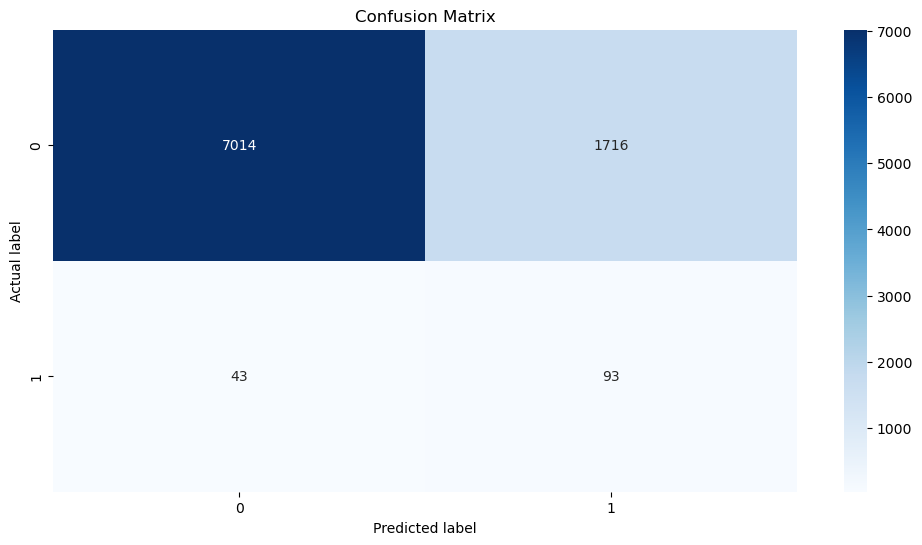

In [91]:
from sklearn.metrics import (classification_report, accuracy_score, confusion_matrix,
                             roc_auc_score, roc_curve, precision_recall_curve, average_precision_score)

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

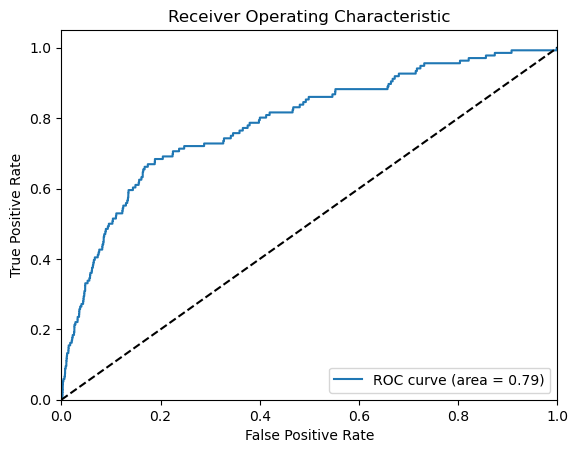

In [92]:
roc_auc = roc_auc_score(y_test, probs)
fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

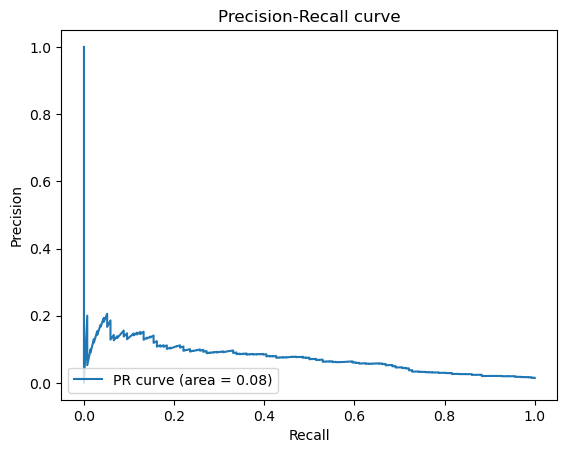

In [93]:
precision, recall, _ = precision_recall_curve(y_test, probs)
average_precision = average_precision_score(y_test, probs)
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

In [99]:
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions)* 100, "%" )

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      8730
           1       0.05      0.68      0.10       136

    accuracy                           0.80      8866
   macro avg       0.52      0.74      0.49      8866
weighted avg       0.98      0.80      0.88      8866

Accuracy: 80.16016241822693 %


# Conclusion

* Terlalu banyak data sintetis yang dioversampling
* Model cenderung terlalu sering memprediksi ke 1 kelas

# Recomendation
Memberbanyak data untuk kelas yang tidak seimbang
